# Flake Training for creating classification catalog

Use this script to train on individual flakes to produce training catalog to be used in classification step

Processing can be done on single flakes or batch process multiple flakes 
    When batch processing, all flakes are clustered automatically one at a time 
    after all flakes are done processing, a review menu queries user input for specifying thickness labels 

- Before Running:
    - Use `image-crop.ipynb` to select a section of image with a particular flaketo be analyzed
        - Note: Images are not actually edited or resaved, croppings are just a pixel area selection to be loaded as input and easily modified

        - For single image processing:
            - Replace `img_config` in `main()` with the parameters from `image-crop.ipynb`
        
        - For batch processing:
            - Paste each set of parameters in `batch_data.json` with the parameters from `image-crop.ipynb`
            
- After making flake selections, run this script to process the images
    - When prompted enter `1` for single image processing
    - or `2` for batch processing

- Follow prompts for reviewing and editing results

- Outputs visualizations for each image's clusters are saved in the `outputs/training/cluster_visualization` folder

- Catalogs for each individual flake are saved in the `outputs/training/catalogs` folder
    - These catalogs will be combined into a master catalog 

- Running the master catalog notebook cell below will compile a catalog for all flakes in the `outputs/training/catalogs` folder
   - Output directory can be changed with the `out_file` parameter in the `main()` function

- Master catalog is saved in the `outputs/training/catalogs` folder as `master_catalog.npz` 
    - This is the catalog used in classification step in `testing.ipynb`
    - master catalog is used as reference during classification step in `testing.ipynb`

Flake Training and catalog generation
1. Train on single image (uses parameters in notebook's main function)
2. Batch process multiple images (uses parameters in `batch_data.json`)
Enter your choice (1 or 2): Starting single image processing...
Image: image_data/example_testing/Fig_4i.jpg
Flake: mos2_pdms
Initialization method: meanshift
Compression rate: None
Processing: mos2_pdms
Image file: image_data/example_testing/Fig_4i.jpg
Crop region: [0, 1300, 2100, 3000]
Masking regions: [[0, 300, 0, 300]]
Compression rate: None
Initialization method: meanshift
Using meanshift initialization method
Running enhanced clustering...
Original image shape: (3488, 4632, 3)
Cropped image shape: (1300, 900, 3)
Applying bilateral filtering...
Fitting and subtracting background...
Manually inspect background reduction, then close figures.


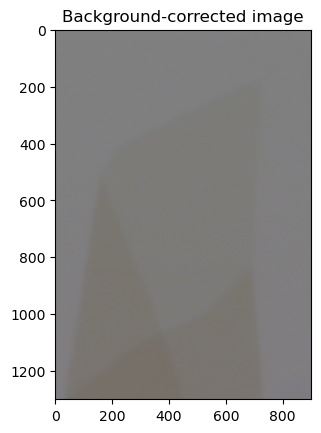

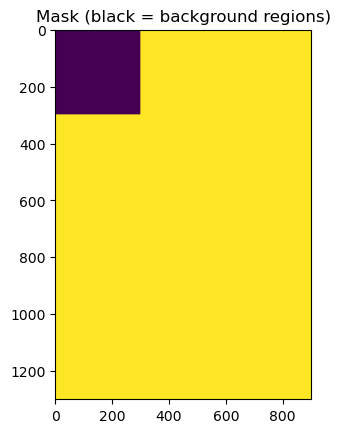

Applying second round of bilateral filtering...
No compression applied - using full resolution
Processing 1170000 valid pixels
Initializing mean-shift clustering...
Starting mean-shift with 512 initial points, epsilon=0.0086


Mean-shift algorithm:   5%|▌         | 27/500 [00:06<01:49,  4.31cycle/s]


Optimization achieved after 27 cycles.
Mean-shift completed: 127 mean points after outlier removal
(Removed 0 outliers with < 6686 pixels)
Mean-shift found 127 mean points
Too many mean points (127), applying DBSCAN consolidation...
Starting DBSCAN consolidation with eps=0.0043
DBSCAN completed: 127 groups from 127 mean points
Still too many clusters (127), applying aggressive consolidation...
Starting DBSCAN consolidation with eps=0.0086
DBSCAN completed: 127 groups from 127 mean points
Fitting to 8 clusters
Initializing covariance matrices...


Creating covariance matrices: 100%|██████████| 8/8 [00:00<00:00, 169.03cluster/s]


Starting GMM Expectation-Maximization...


EM algorithm (converged at cycle 300):  30%|███       | 301/1001 [00:59<02:18,  5.04cycle/s]


Optimization achieved after 300 cycles
GMM training completed.
Assigning pixels to clusters...
Converting results to CPU...
Creating confidence ellipsoids...


Creating ellipsoids: 100%|██████████| 8/8 [00:00<00:00, 6878.73cluster/s]


Total runtime: 67.65 seconds
Creating visualizations...


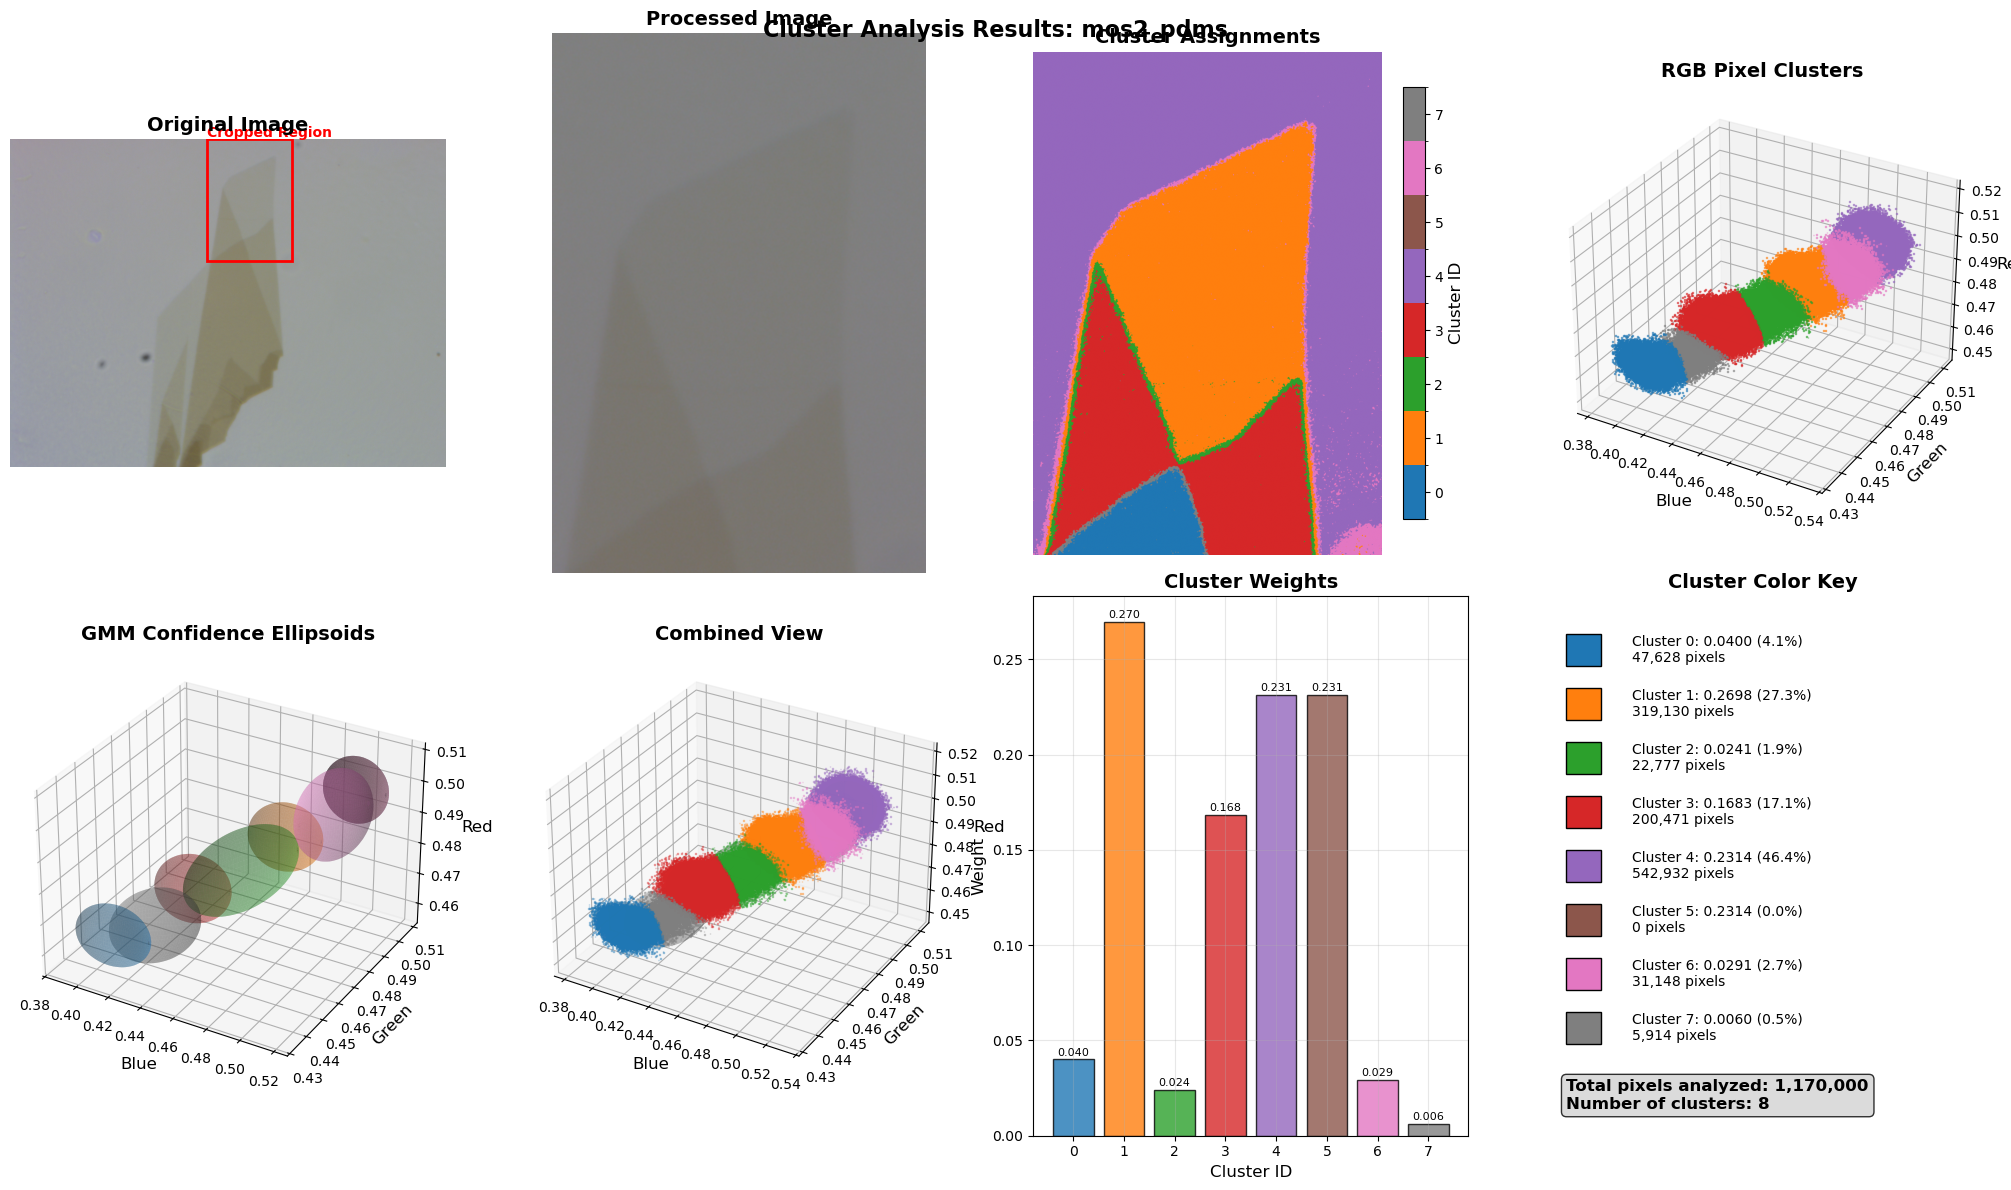

✓ Clustering completed for mos2_pdms
Clustering completed in 98.25 seconds

=== Reviewing Results for mos2_pdms ===
Number of clusters found: 8
Cluster weights: [0.04004971 0.26976175 0.02411539 0.16832358 0.23135907 0.23135907
 0.02906799 0.00596345]
Cluster 0: Weight = 0.0400, Pixels = 47,628 (4.1%)
Cluster 1: Weight = 0.2698, Pixels = 319,130 (27.3%)
Cluster 2: Weight = 0.0241, Pixels = 22,777 (1.9%)
Cluster 3: Weight = 0.1683, Pixels = 200,471 (17.1%)
Cluster 4: Weight = 0.2314, Pixels = 542,932 (46.4%)
Cluster 5: Weight = 0.2314, Pixels = 0 (0.0%)
Cluster 6: Weight = 0.0291, Pixels = 31,148 (2.7%)
Cluster 7: Weight = 0.0060, Pixels = 5,914 (0.5%)

CLUSTER THICKNESS ASSIGNMENT
Please examine the cluster visualization and assign thickness values.
The visualization shows:
  - Original and processed images
  - Cluster assignments with color coding
  - Individual cluster masks
  - RGB distribution and statistics

INITIAL THICKNESS ASSIGNMENT


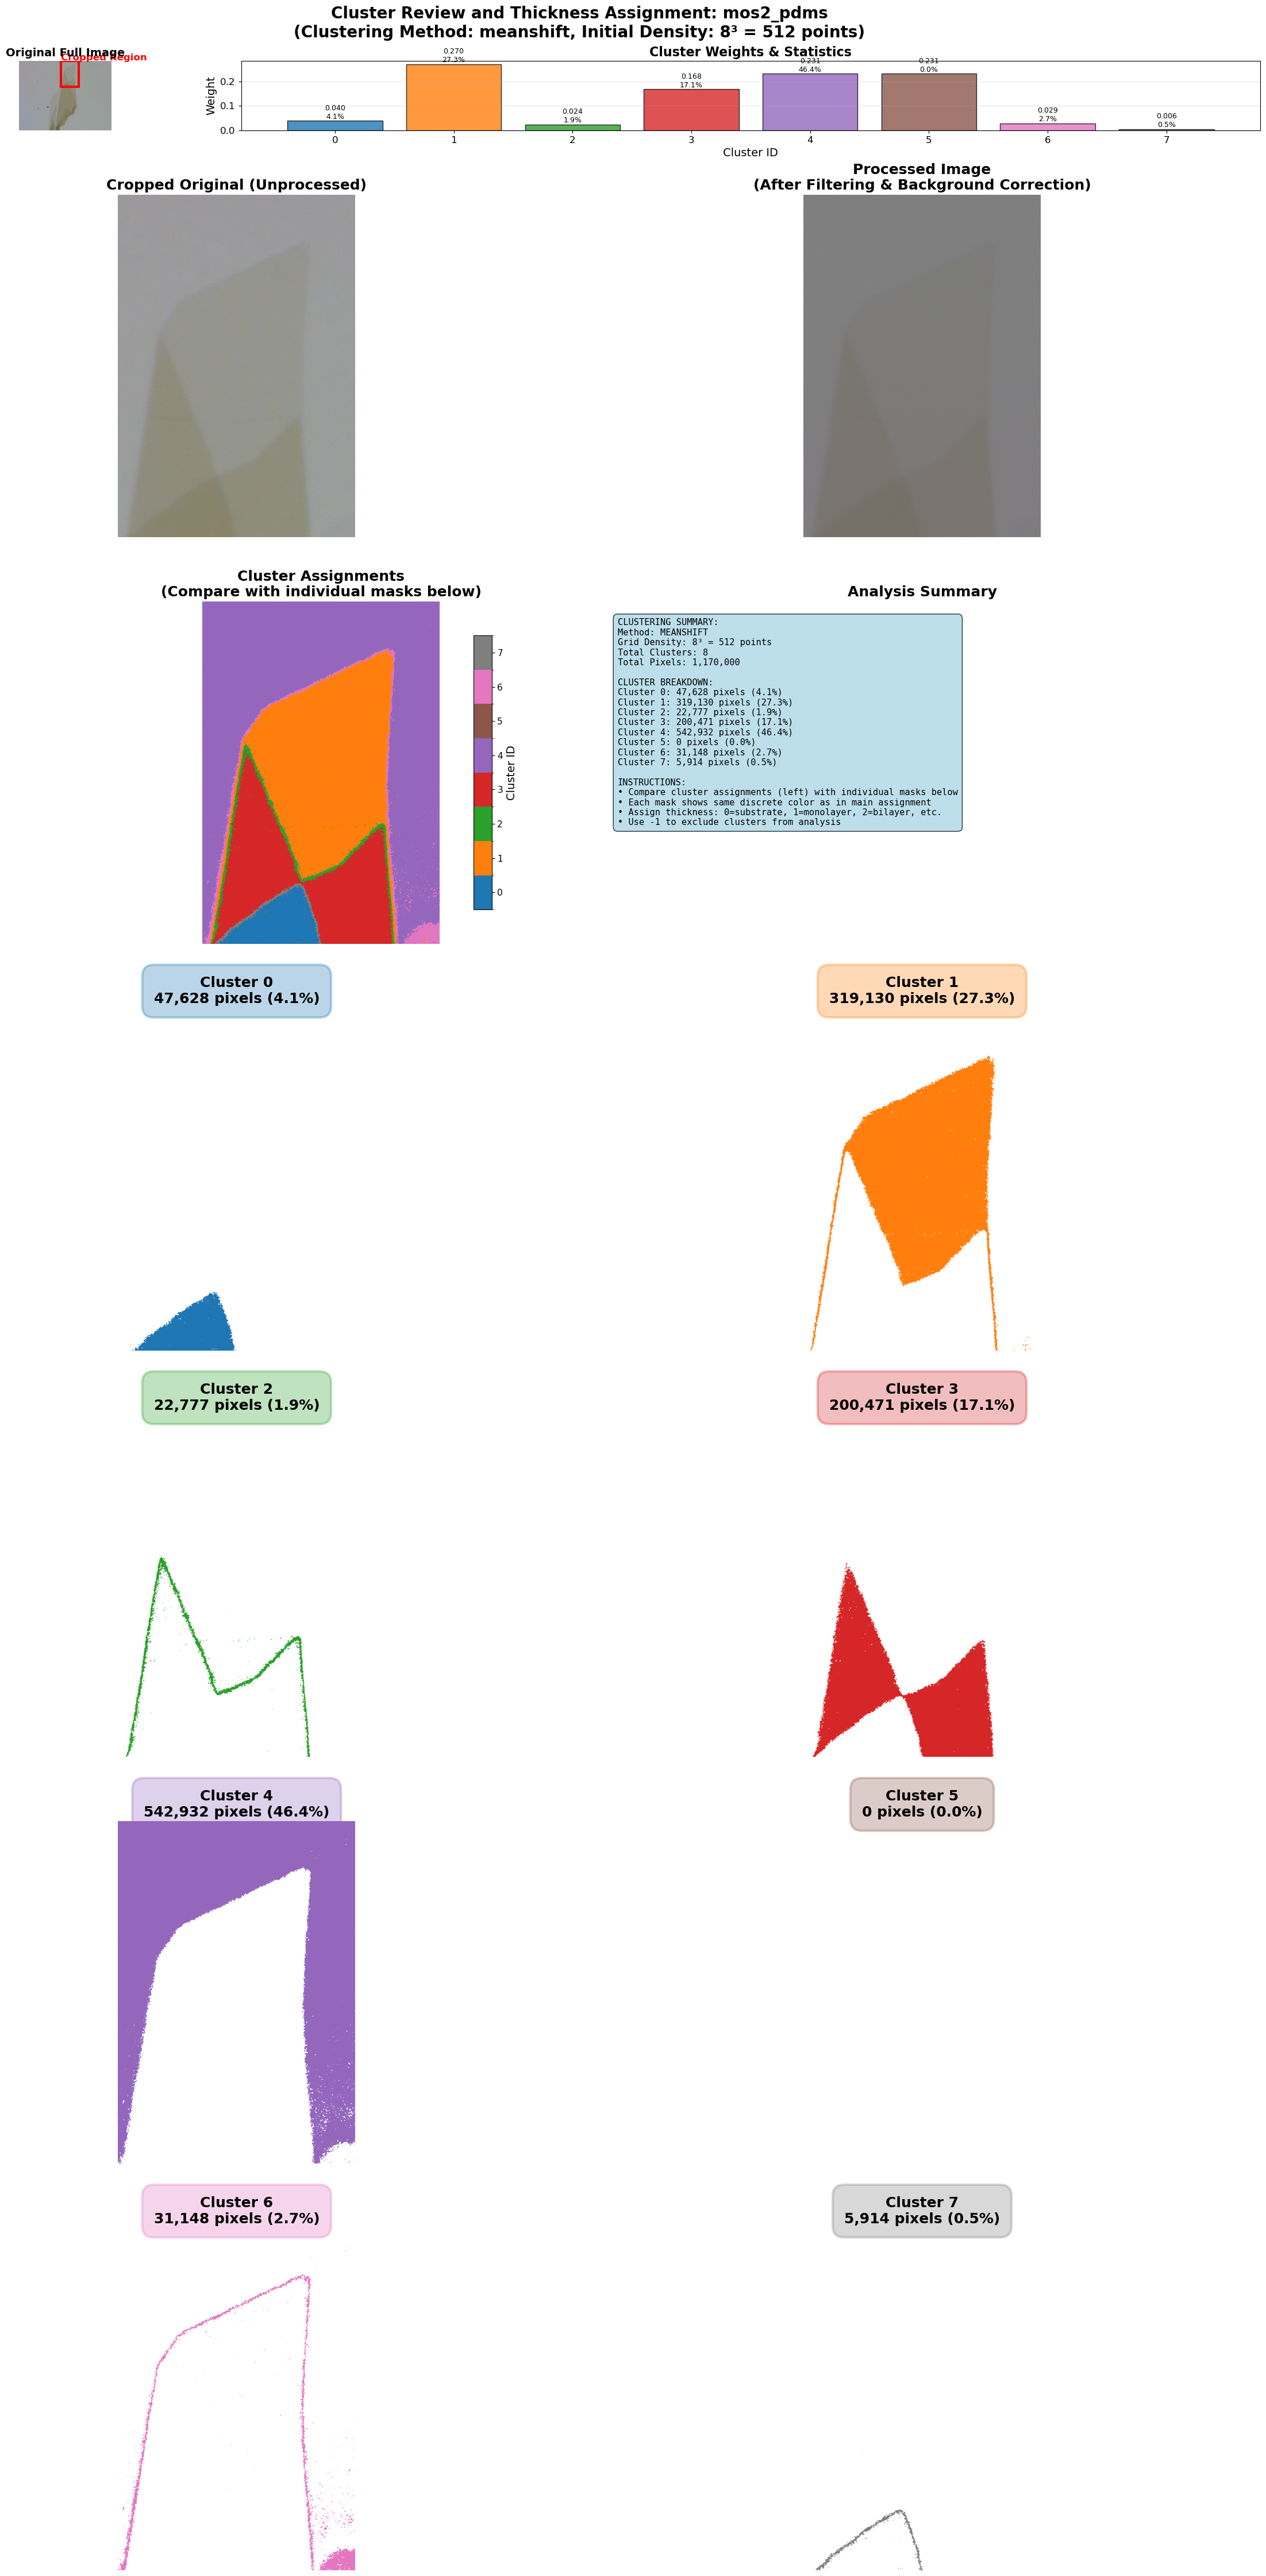


THICKNESS ASSIGNMENT
Total clusters to assign: 8
Examine the visualization above:
• Compare large cluster assignments with individual masks below
Enter thickness for each cluster (0=substrate, 1=monolayer, 2=bilayer, etc., -1=exclude)
------------------------------------------------------------
  └─ Assigned: 3 layers
  └─ Assigned: 1 layer
  └─ Assigned: 2 layers
  └─ Assigned: 2 layers
  └─ Assigned: Background/Substrate
  └─ Assigned: 2 layers
  └─ Assigned: 1 layer
  └─ Assigned: 3 layers

ASSIGNMENT SUMMARY
Cluster 0: 3 layers (47,628 pixels, 4.1%)
Cluster 1: 1 layer (319,130 pixels, 27.3%)
Cluster 2: 2 layers (22,777 pixels, 1.9%)
Cluster 3: 2 layers (200,471 pixels, 17.1%)
Cluster 4: Background/Substrate (542,932 pixels, 46.4%)
Cluster 5: 2 layers (0 pixels, 0.0%)
Cluster 6: 1 layer (31,148 pixels, 2.7%)
Cluster 7: 3 layers (5,914 pixels, 0.5%)

Final Assignment Summary (Round 1):
--------------------------------------------------
Cluster 0: 3 layer(s)
  └─ 47,628 pixels (4.1%)

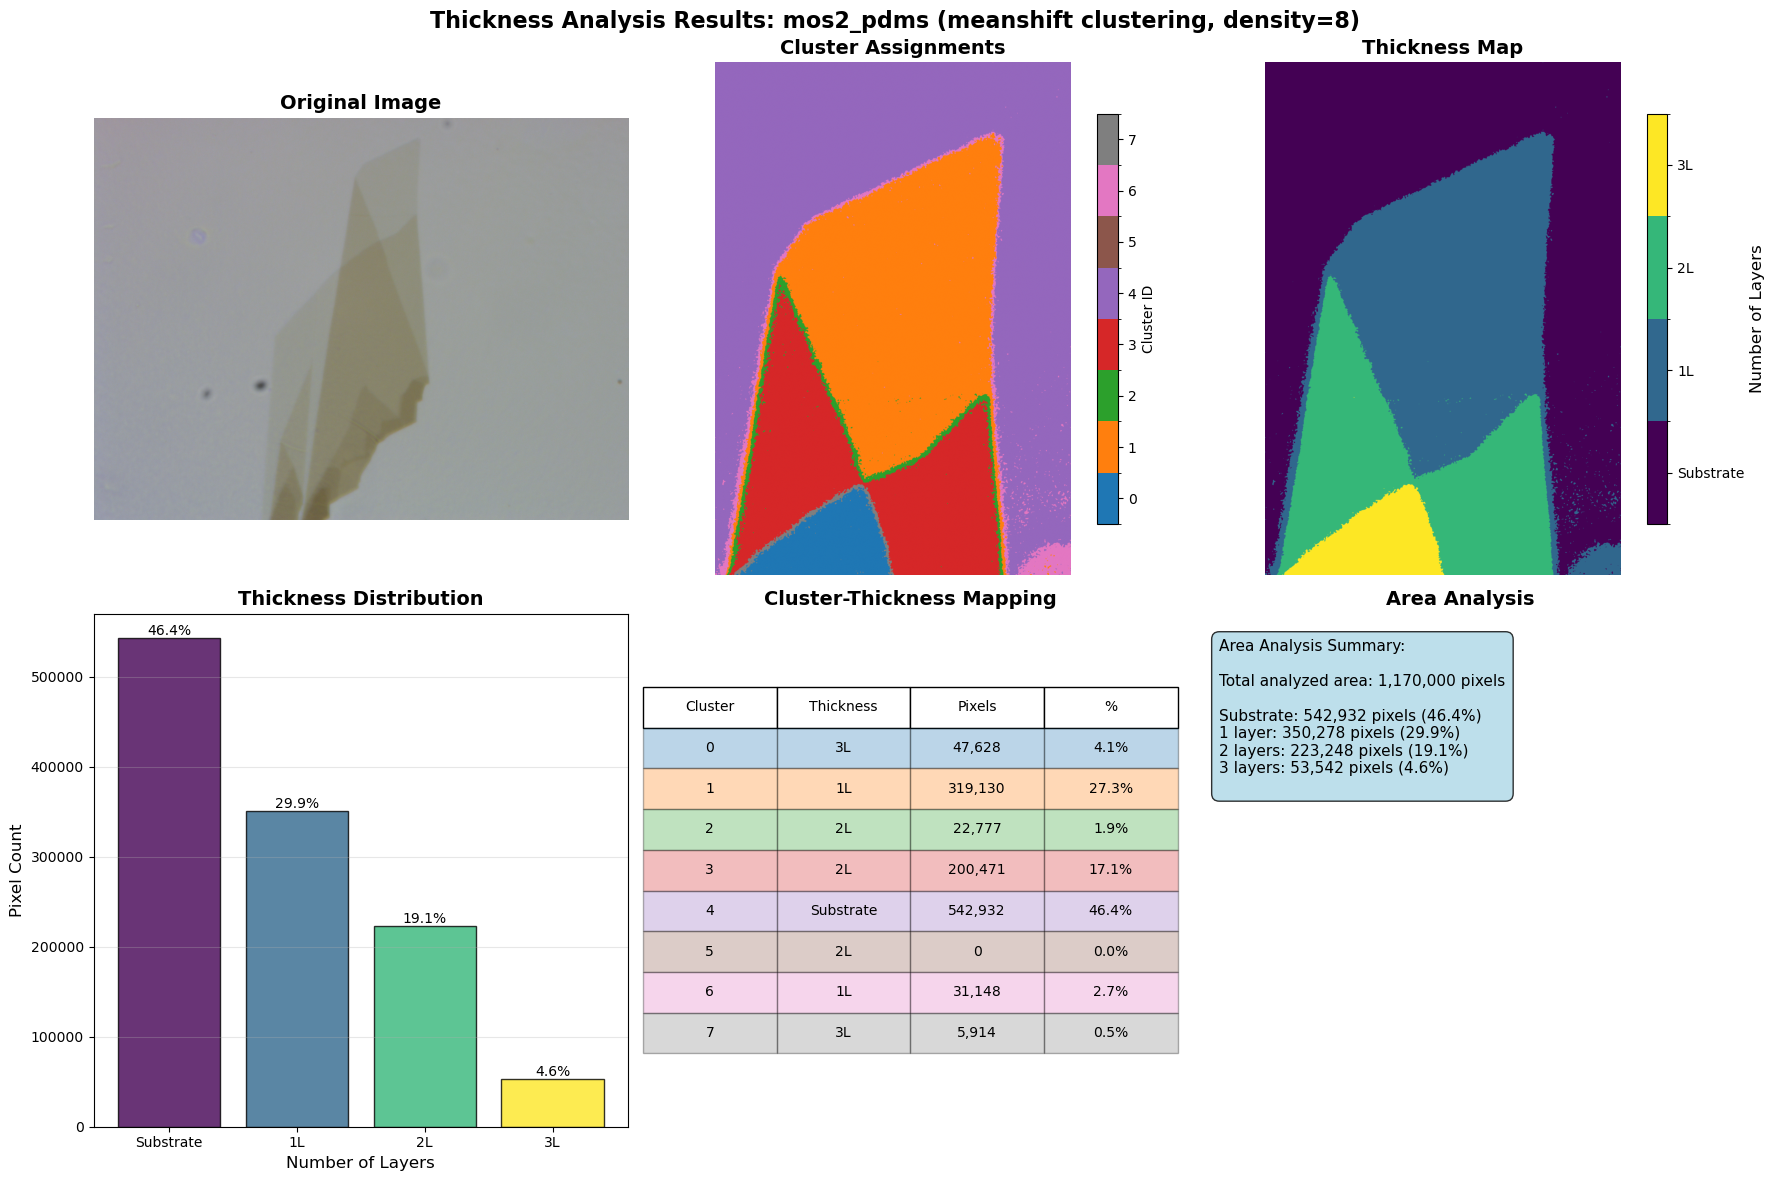

✓ Preview visualization complete!

ASSIGNMENT REVIEW
Are you satisfied with these thickness assignments?
Please review the thickness visualization above.
Options:
  y/yes  - Accept assignments and continue
  n/no   - Redo thickness assignments
  c/cancel - Cancel and return original results
✓ Assignments accepted. Proceeding with analysis...

✓ Thickness assignments applied to results.

✓ Processing complete for mos2_pdms!
Created new file ./outputs/training/catalogs/mos2_pdms.npz
Saving mos2_pdms: meanshift initialization (density=8)
Results saved to ./outputs/training/catalogs/mos2_pdms.npz
Final results saved to ./outputs/training/catalogs/mos2_pdms.npz


In [1]:
import time
from utils.clustering_core import process_single_image, batch_processing
from utils.data_management import review_and_edit_results, save_clustering_results

def main():

    # Define image-specific parameters 
    img_config = {
        "img_file": "image_data/example_testing/Fig_4i.jpg",
        "flake_name": "mos2_pdms",
        "crop": [0,1300,2100,3000],
        "masking": [[0,300,0,300]]
    }
    
    # Define base training parameters
    base_params = {
        "min_clusters": 8,
        "max_clusters": 8,
        "convergence_param": 1e-6,
        "comp_rate": None,  
        "batch_size": 50000,
        "initialization_method": "meanshift",  
        "density": 8  
    }
    
    # Output file path for each flake's catalog
    out_file = f"./outputs/training/catalogs/{img_config['flake_name']}.npz"
    
    # Start timer for performance benchmarking
    start_time = time.perf_counter()
    
    # Print processing information
    print(f"Starting single image processing...")
    print(f"Image: {img_config['img_file']}")
    print(f"Flake: {img_config['flake_name']}")
    print(f"Initialization method: {base_params['initialization_method']}")
    print(f"Compression rate: {base_params['comp_rate']}")
    
    try:
        # Process the single image 
        results = process_single_image(
            img_config=img_config,
            base_params=base_params,
            show_plot=True  # Show plots for single image processing
        )
        
        # End timer for performance benchmarking
        end_time = time.perf_counter()
        total_time = end_time - start_time
        
        print(f"Clustering completed in {total_time:.2f} seconds")
        
        # Review and assign thickness labels to clusters
        edited_results = review_and_edit_results(results, img_config['flake_name'])
        
        # Save the final results
        final_data = save_clustering_results(edited_results, out_file)
        
        print(f"Final results saved to {out_file}")
        
        return final_data
        
    except Exception as e:
        print(f"Error during clustering: {e}")
        print("Please check your input parameters and file paths.")
        return None


# Main Menu prompts are below
# selections will run the functions from above
# if only processing a single image, edit the parameters in the main() function above
# batch processing parameters use the settings in batch_data.json instead

print("Flake Training and catalog generation")
print("=====================================")
print("1. Train on single image (uses parameters in notebook's main function)")
print("2. Batch process multiple images (uses parameters in `batch_data.json`)", flush=True) 


print("Enter your choice (1 or 2): ", end="", flush=True)
choice = input().strip()

if choice == "1":
    results = main()
    
elif choice == "2":
    batch_processing()
    
else:
    print("Invalid choice. Running default example with preprocessing.")
    results = main()

# Generate a master catalog

The function will complile all `.npz` files for individual flakes in the `outputs/catalogs` directory into a master catalog in the `outputs/master_catalog` directory

Classification is performed using `testing.ipynb` and the master catalog generated in this step.


In [2]:
from utils.data_management import create_master_catalog

result = create_master_catalog(
    'outputs/training/catalogs', 
    'outputs/training/master_catalog/mos2_on_pdms_master_catalog.npz',
    max_layers=8,           # Look for 1-8 layer materials
    include_residue=False,   # No residue data
)

Found 1 catalog files:
  - mos2_pdms.npz

Processing mos2_pdms.npz...
  Found thickness assignments: {0: np.int64(3), 1: np.int64(1), 2: np.int64(2), 3: np.int64(2), 4: np.int64(0), 5: np.int64(2), 6: np.int64(1), 7: np.int64(3)}
  Added cluster 4 for 0 layers: 542932 pixels
  Added cluster 1 for 1 layer: 319130 pixels
  Added cluster 6 for 1 layer: 31148 pixels
  Added cluster 2 for 2 layers: 22777 pixels
  Added cluster 3 for 2 layers: 200471 pixels
  Added cluster 0 for 3 layers: 47628 pixels
  Added cluster 7 for 3 layers: 5914 pixels
  Successfully processed 4 thickness categories

Final master data for 0 layers: 542932 total pixels averaged

Final master data for 1 layer: 350278 total pixels averaged

Final master data for 2 layers: 223248 total pixels averaged

Final master data for 3 layers: 53542 total pixels averaged

Final Results:
Master weights: {'weights-0layers': np.float64(0.23135906690303223), 'weights-1layers': np.float64(0.24835838296179746), 'weights-2layers': np.fl